# # Name : Asad ullah
# Batch : DS2312

**Project Description**
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.



In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
df= pd.read_csv('Grades.csv')

In [30]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [31]:
df.shape

(571, 43)

In [32]:
df.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

There are so many nulls in datset let's deal with it

In [33]:
#Checking for categorical columns
categorical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")


#Checking for Numerical columns
numerical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)
print("\n")

Categorical Columns:  ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']


Numerical Columns:  ['CGPA']




In [34]:

from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566.0,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,567.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,568.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,569.0,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [35]:
from sklearn.impute import KNNImputer

In [39]:
knnimp = KNNImputer(n_neighbors=3)
for i in df.columns:
    df[i]= knnimp.fit_transform(df[i].values.reshape(-1,1))
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566.0,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,567.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,568.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,569.0,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [40]:
df.isna().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Dealt with null values

In [45]:
df.drop('Seat No.',axis=1, inplace=True)
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


# Univaraite Analysis 

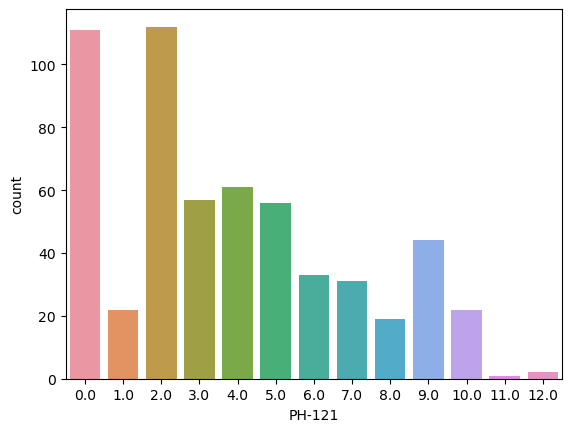

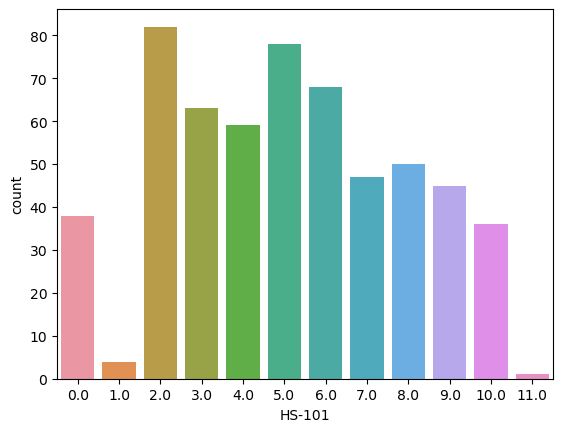

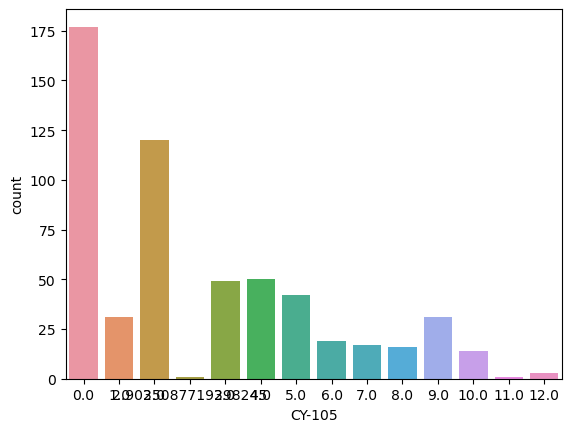

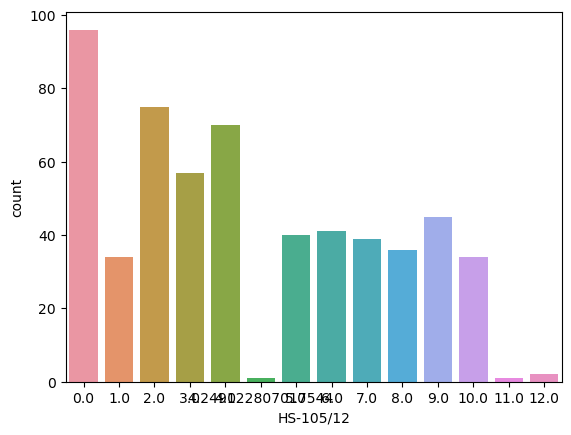

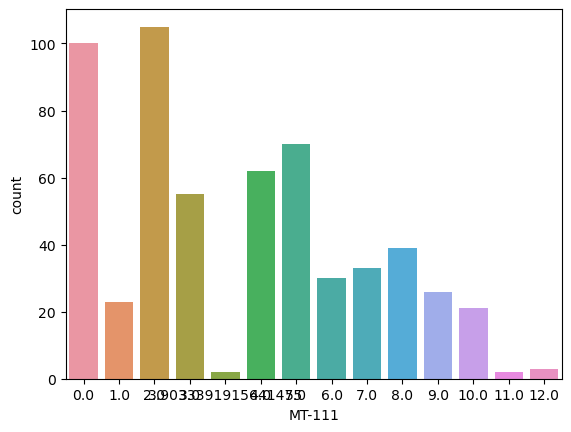

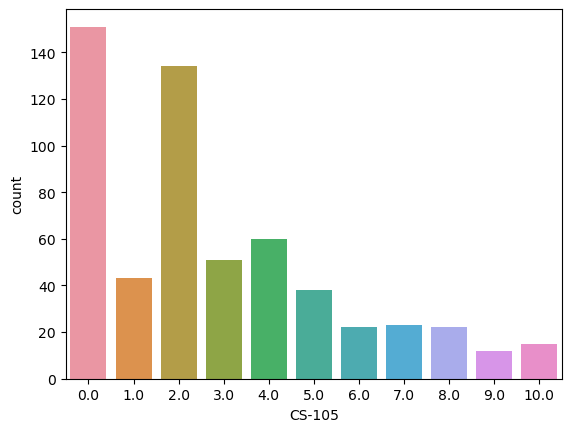

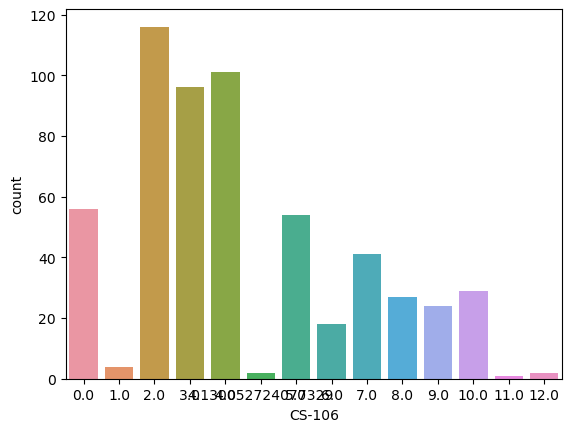

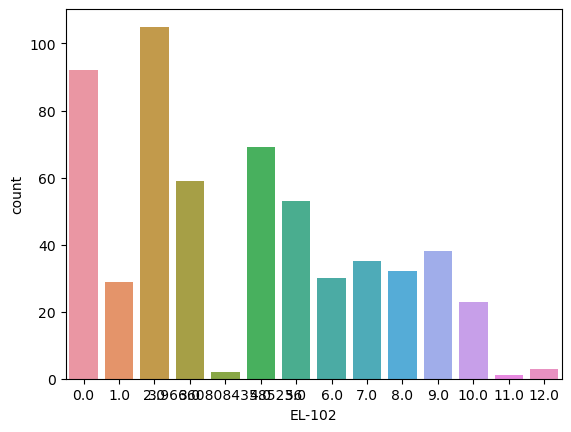

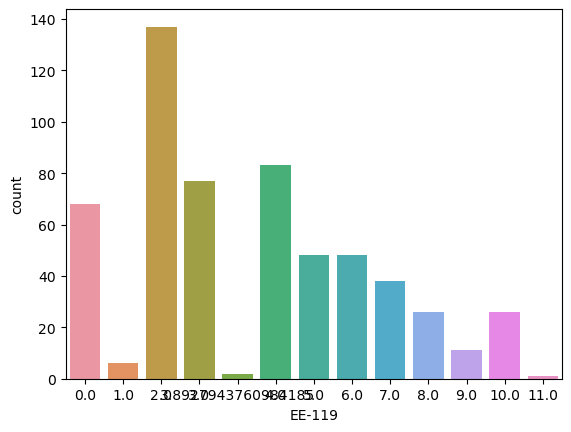

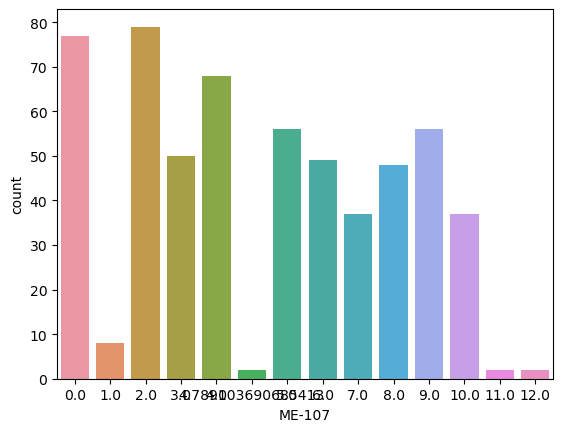

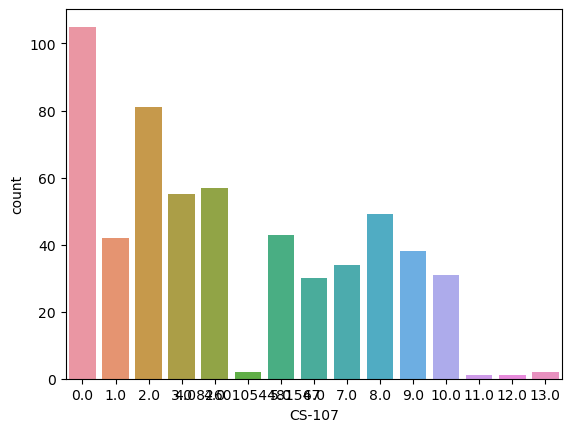

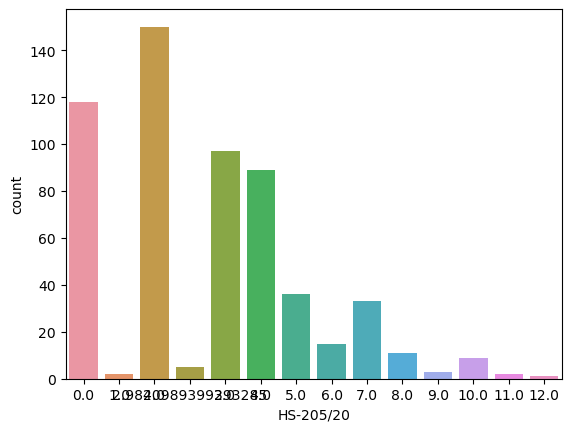

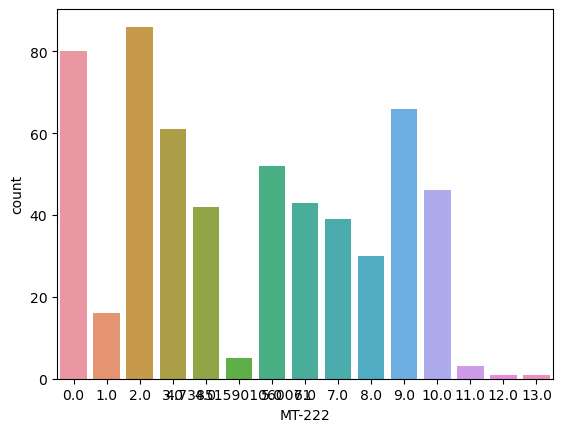

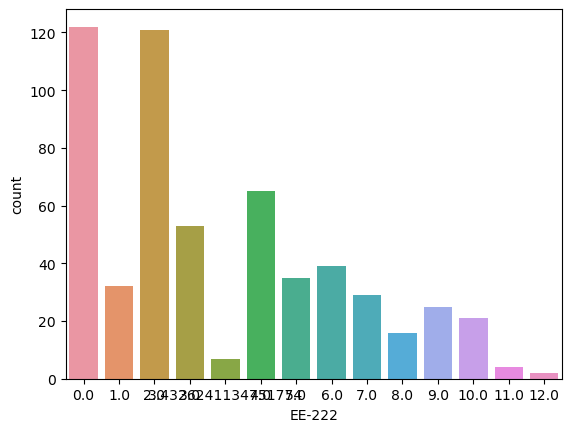

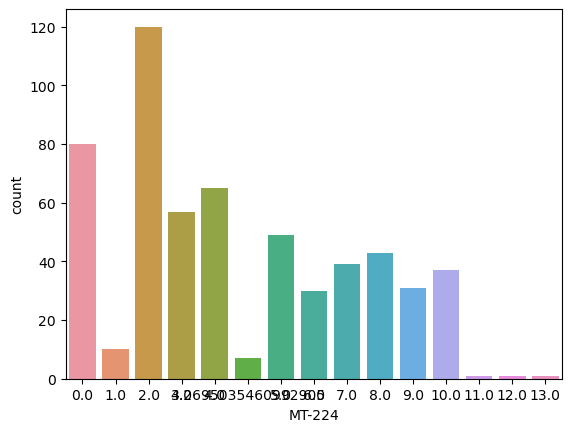

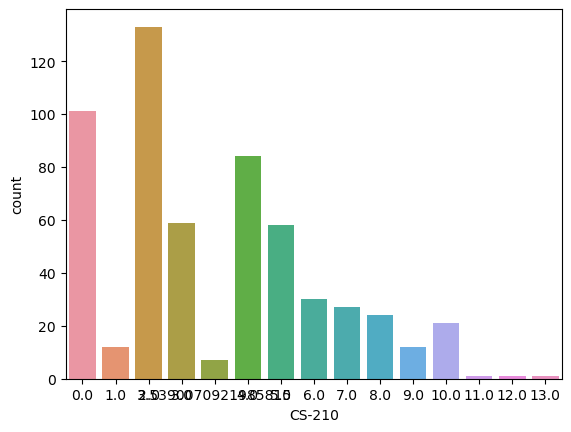

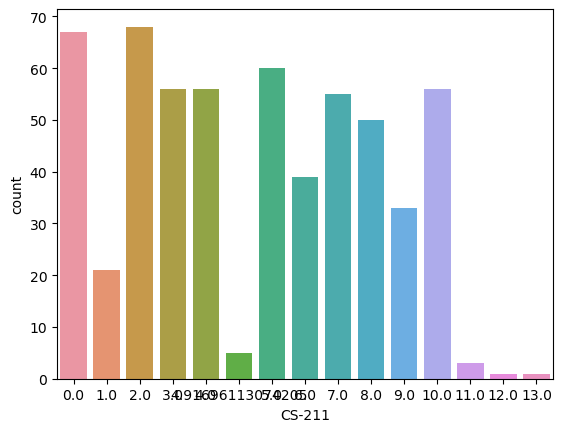

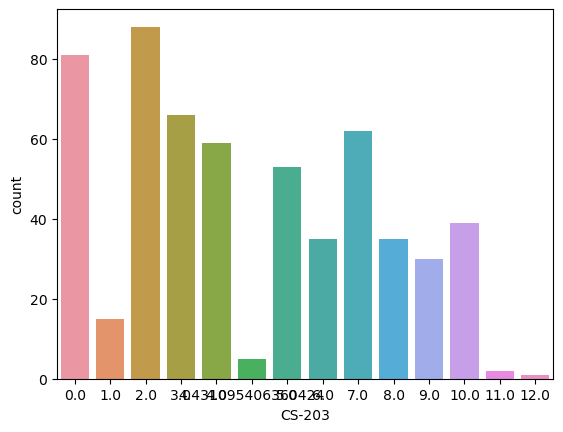

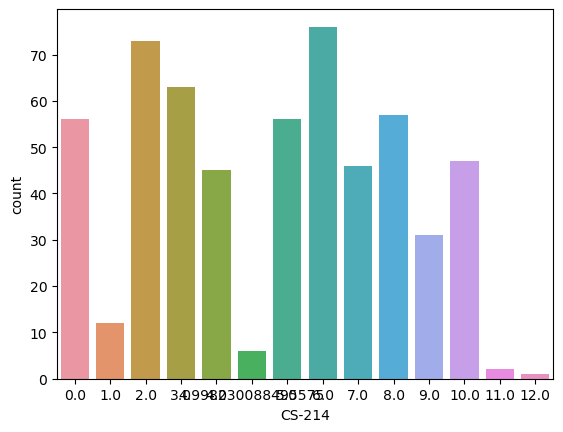

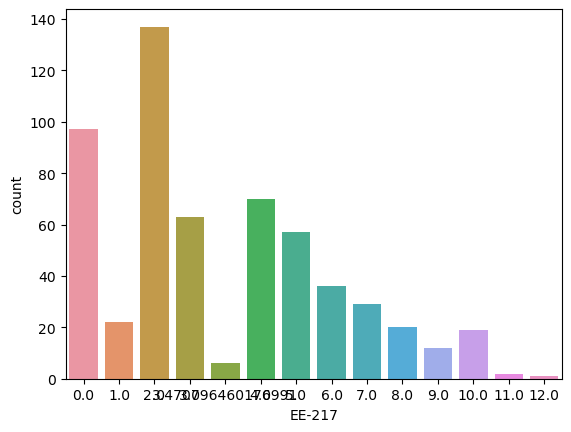

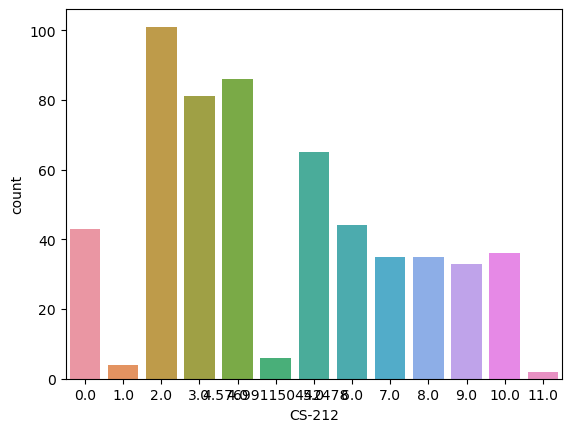

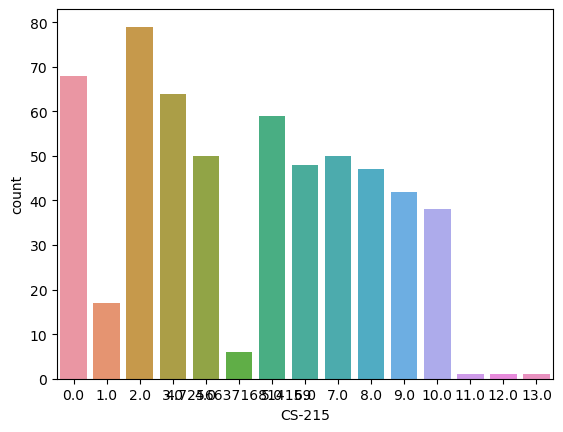

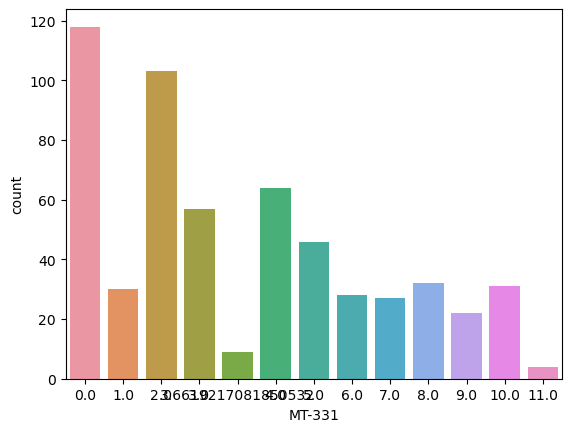

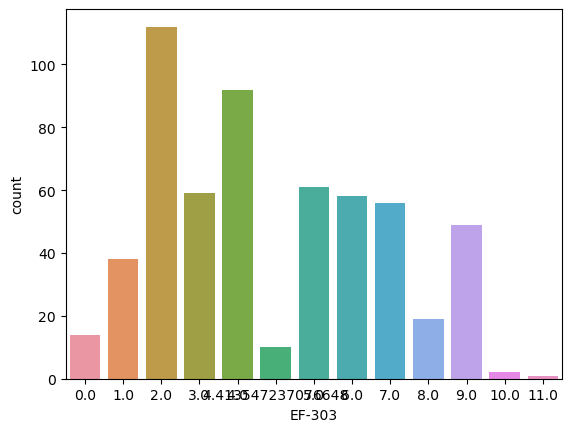

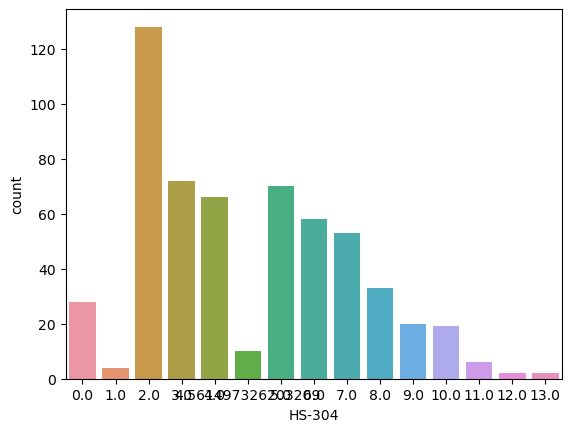

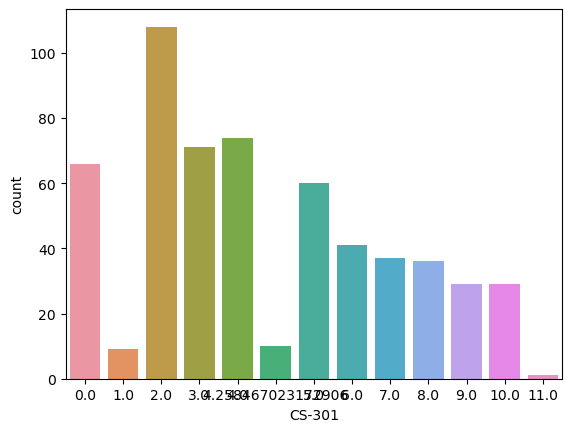

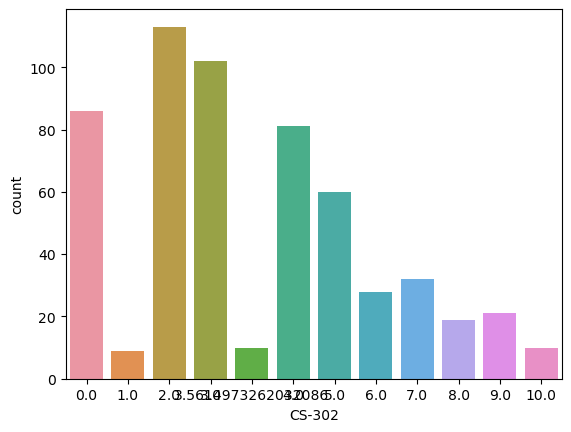

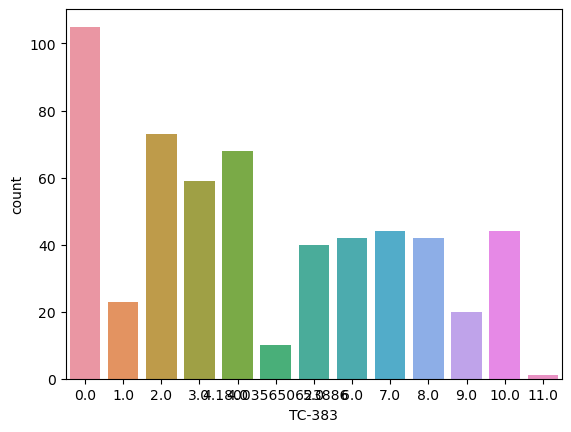

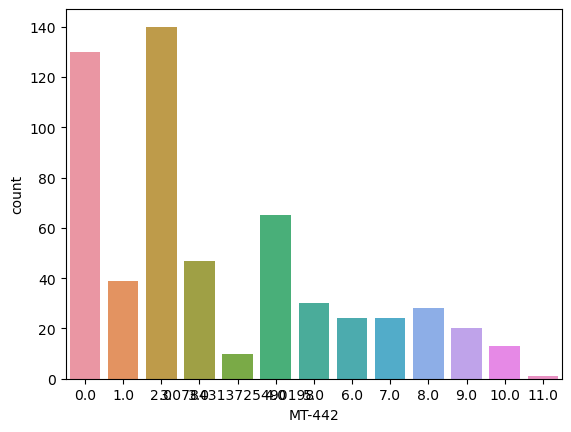

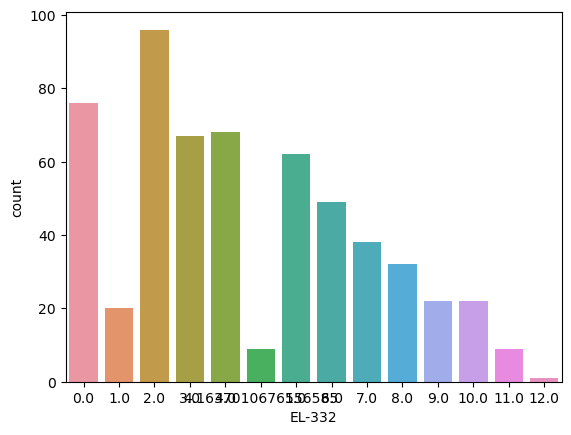

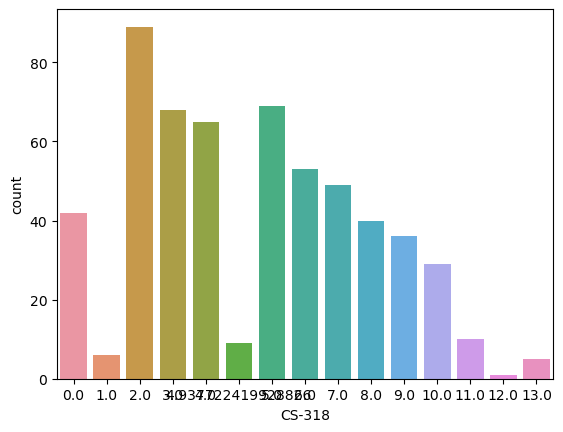

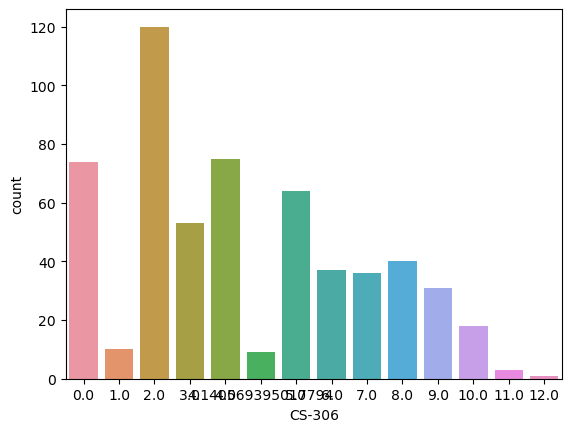

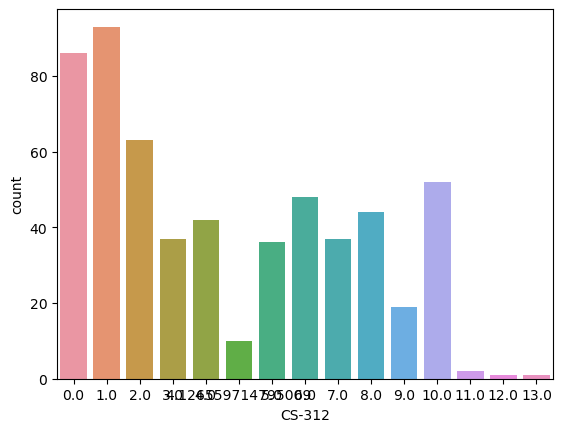

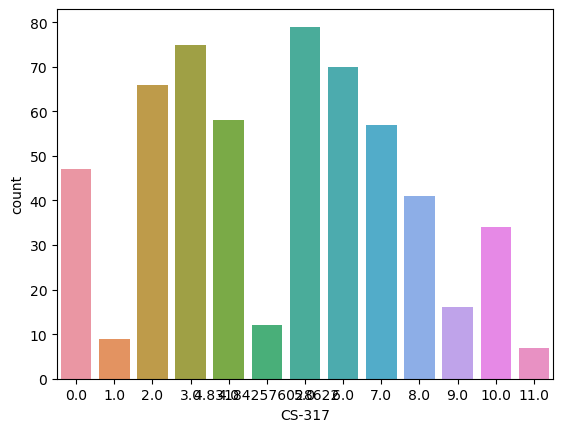

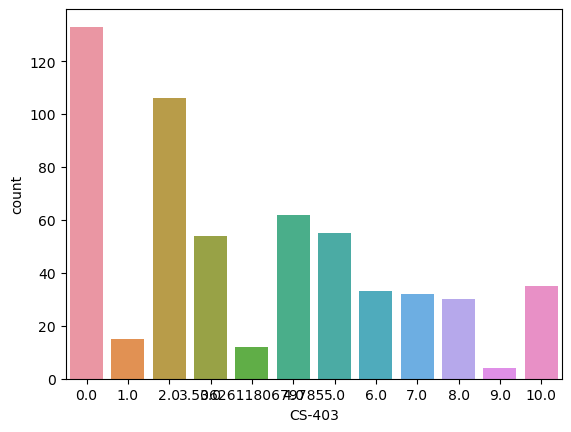

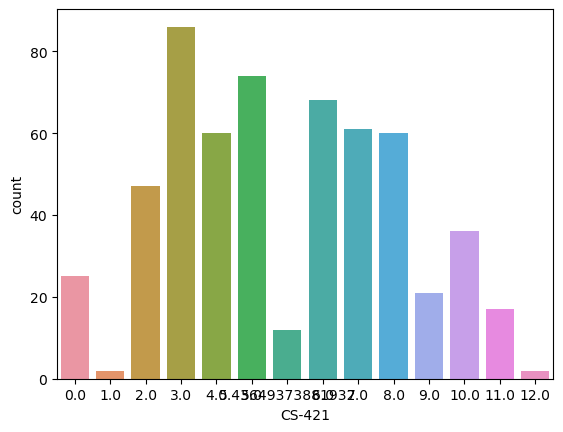

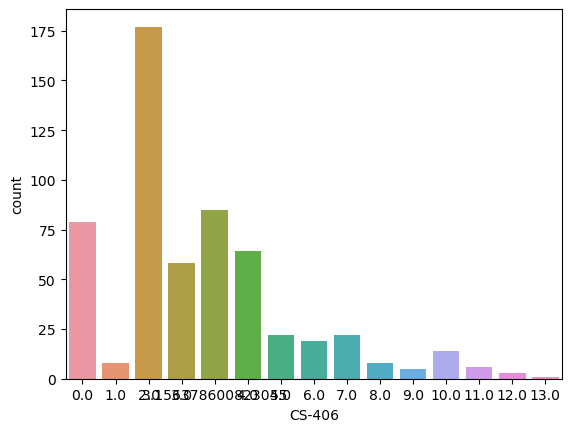

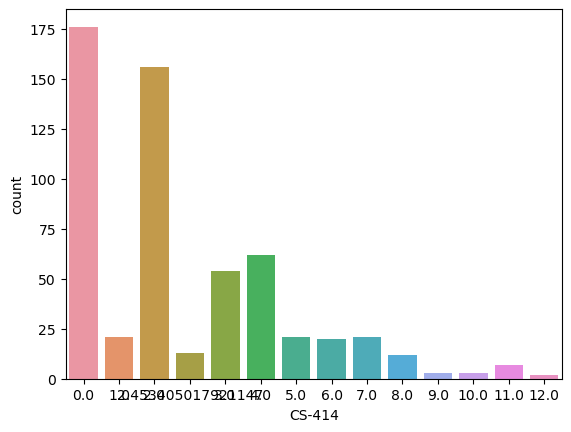

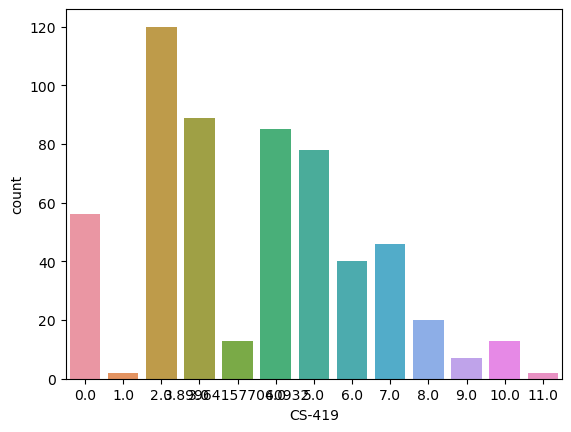

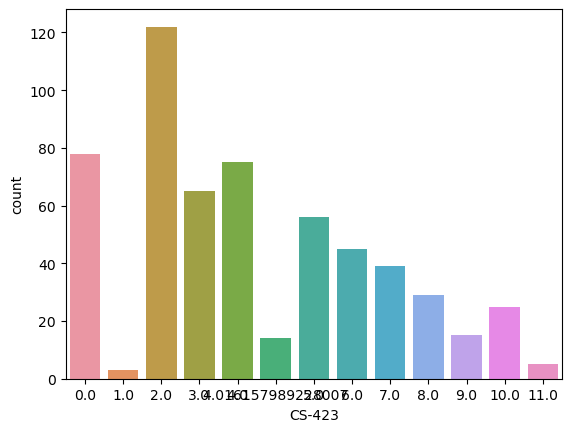

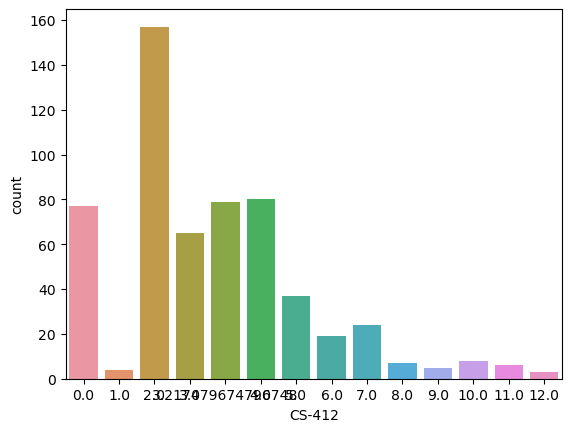

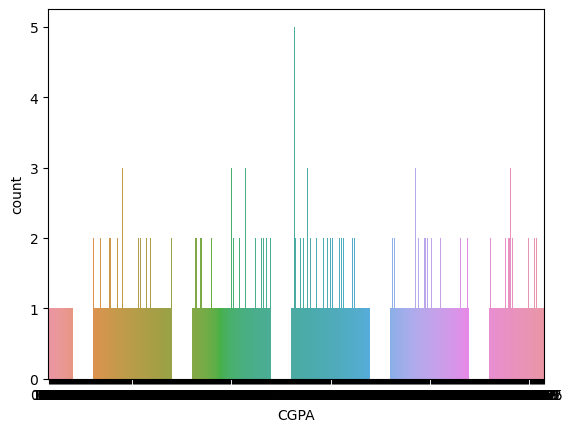

In [49]:
for i in df.columns:
    sns.countplot(x=df[i],data=df)
    plt.show()


# BiVariate Analysis

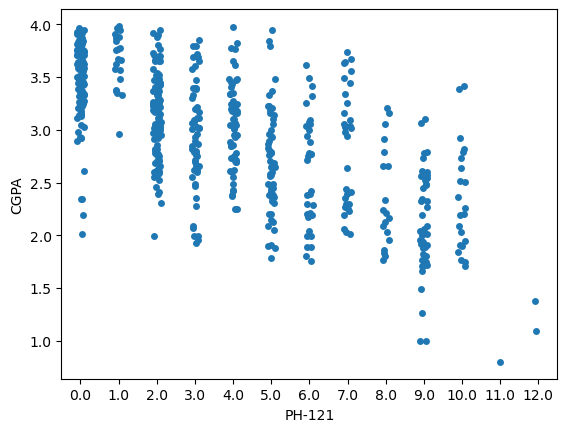

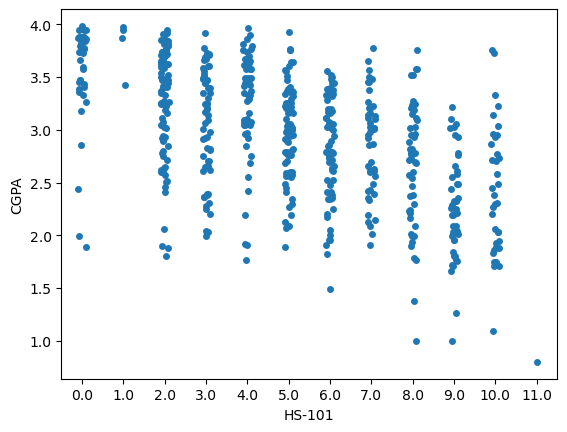

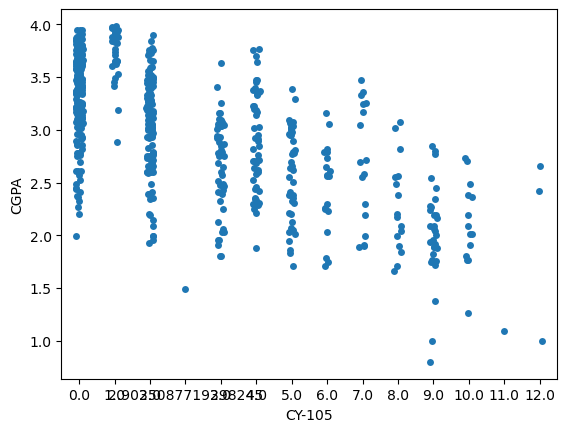

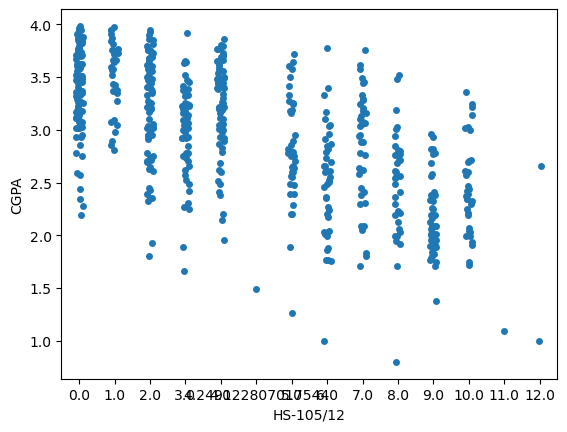

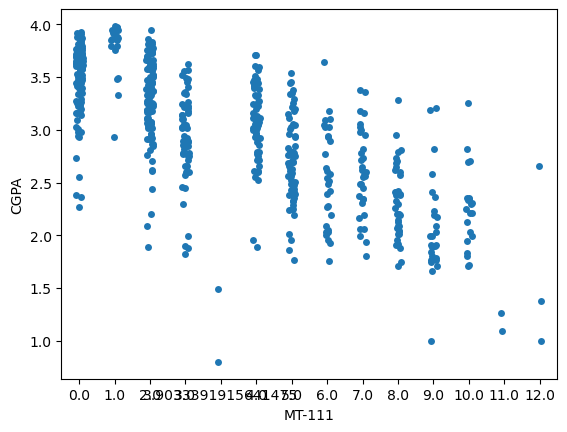

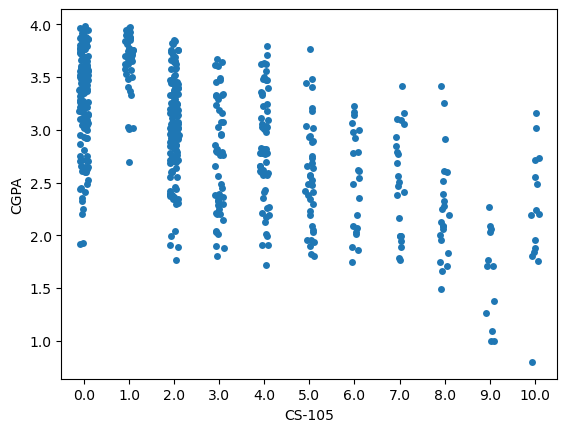

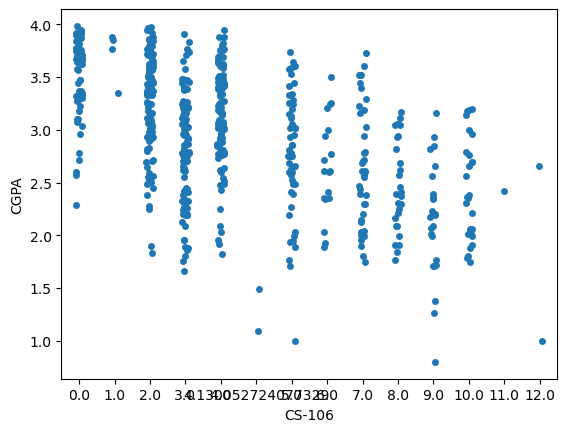

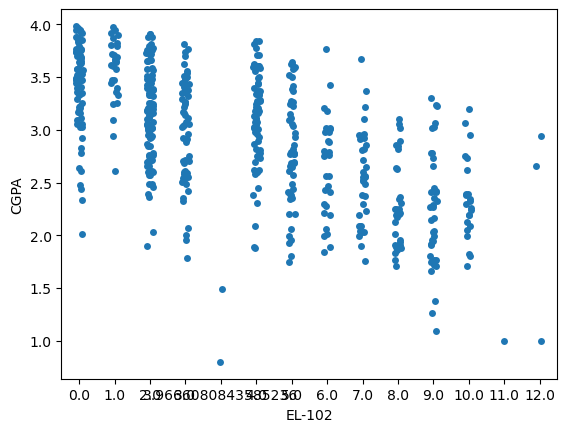

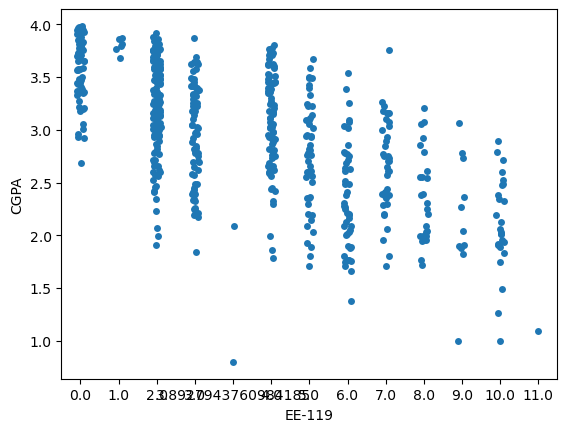

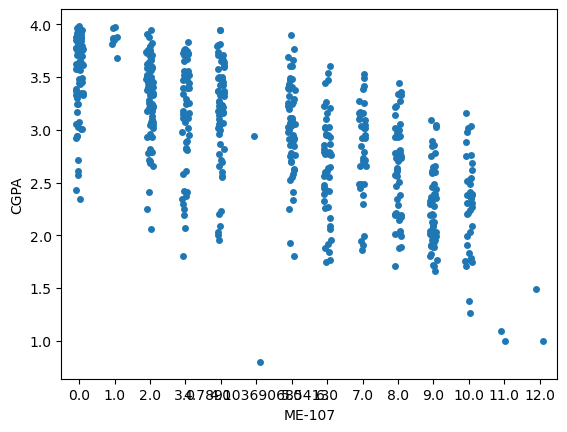

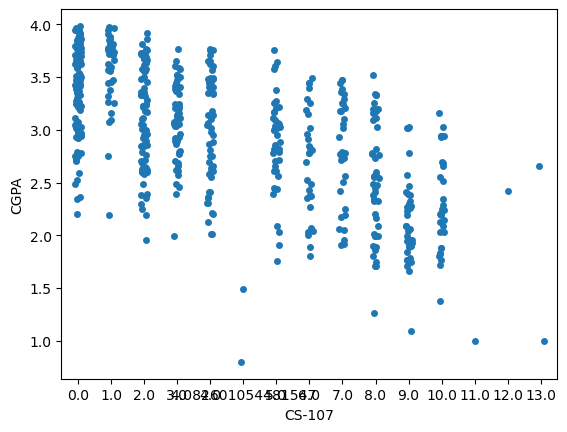

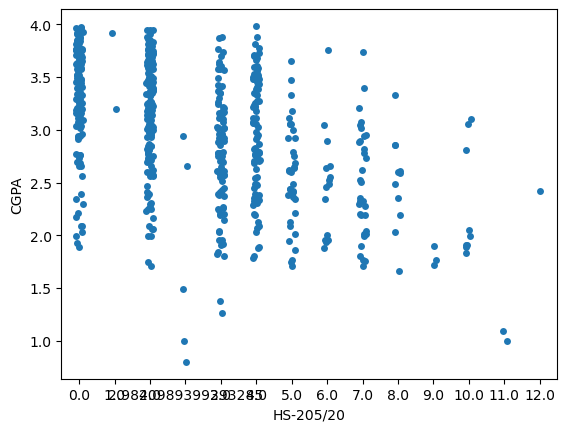

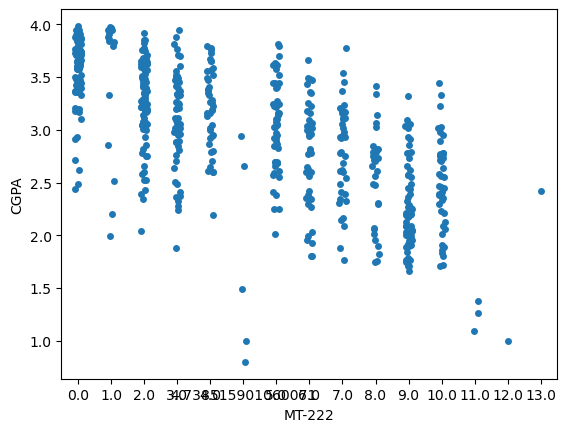

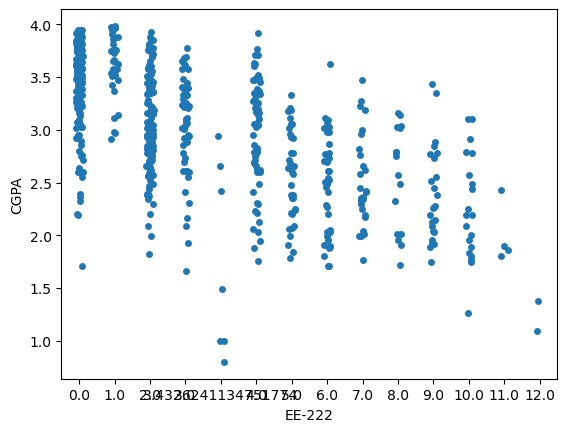

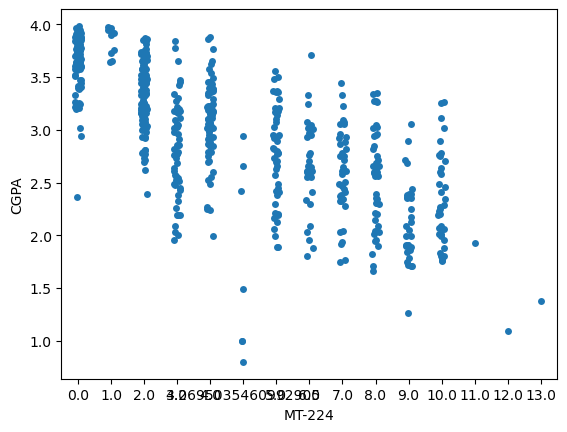

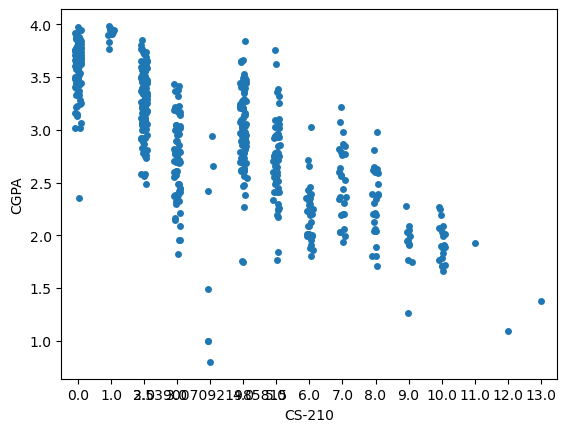

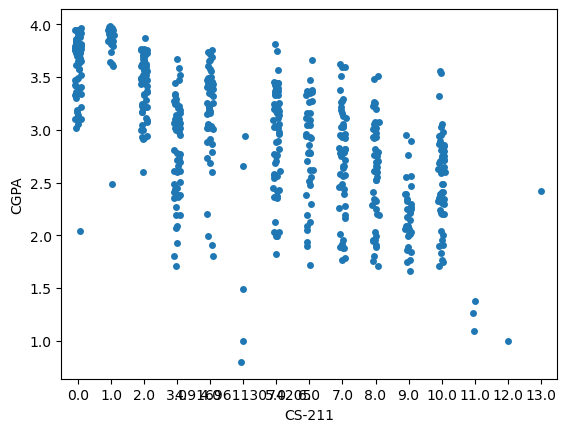

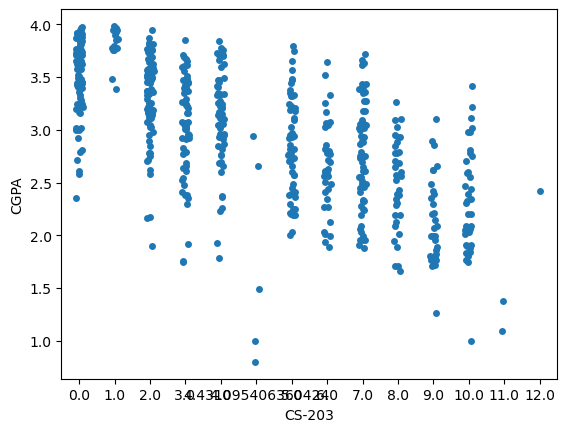

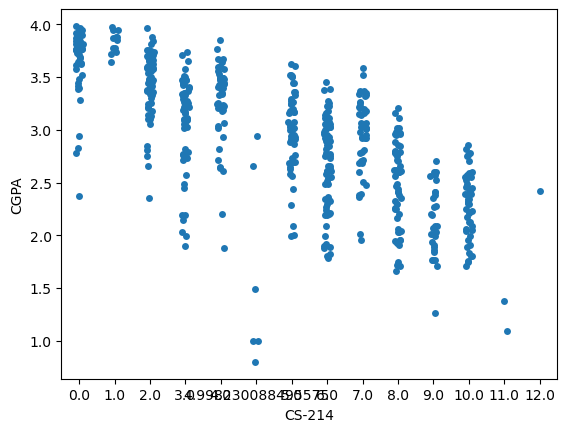

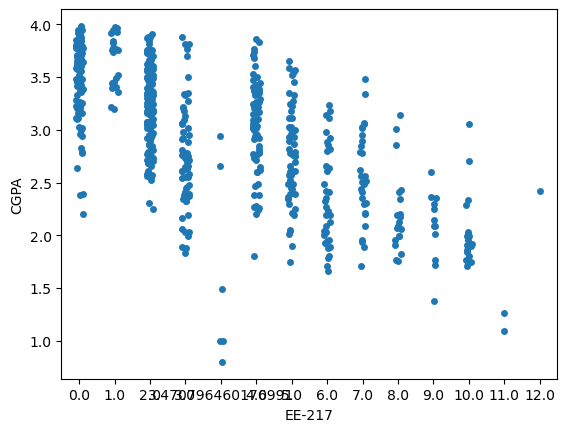

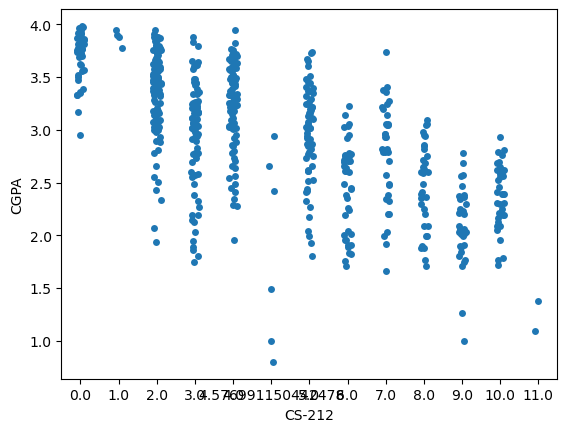

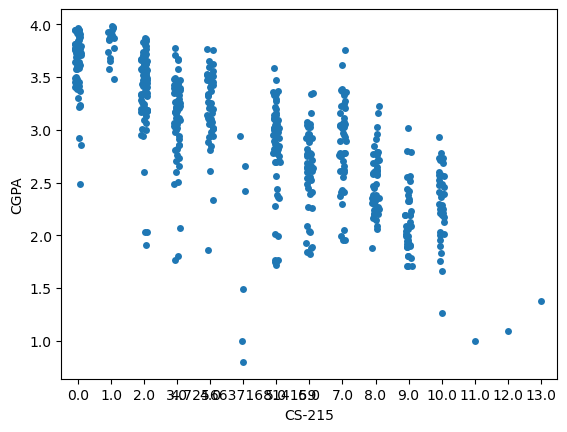

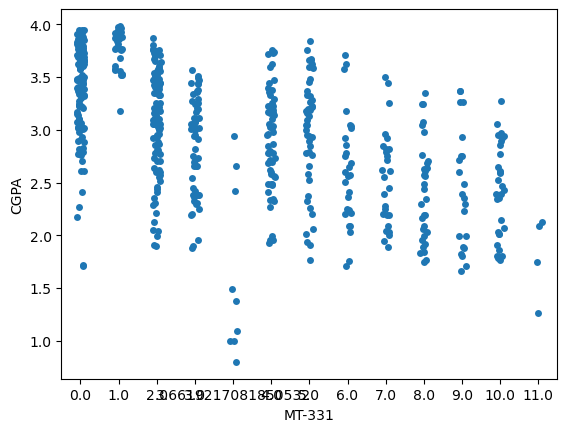

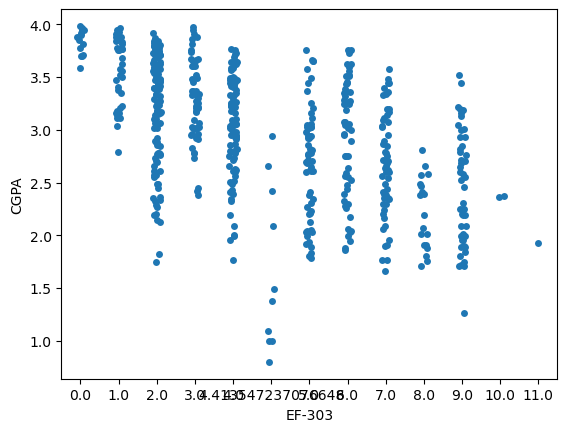

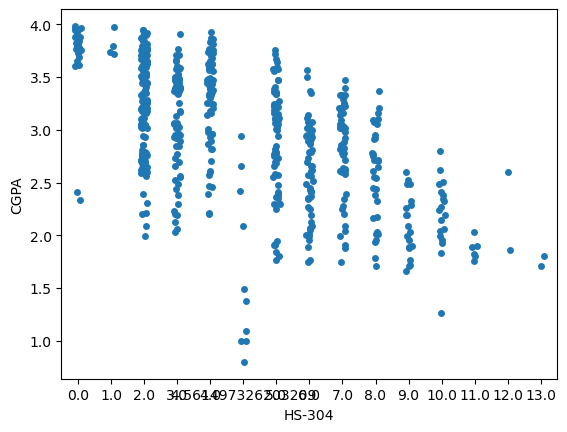

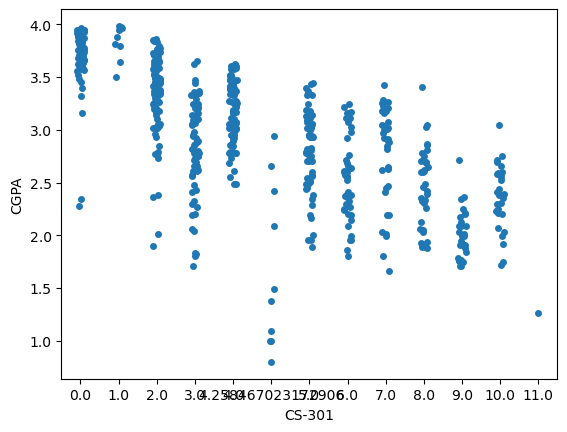

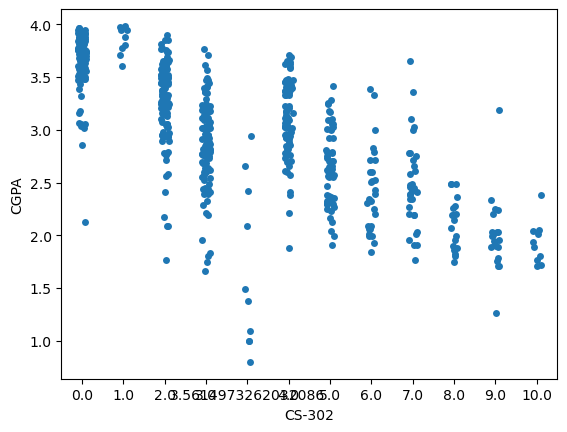

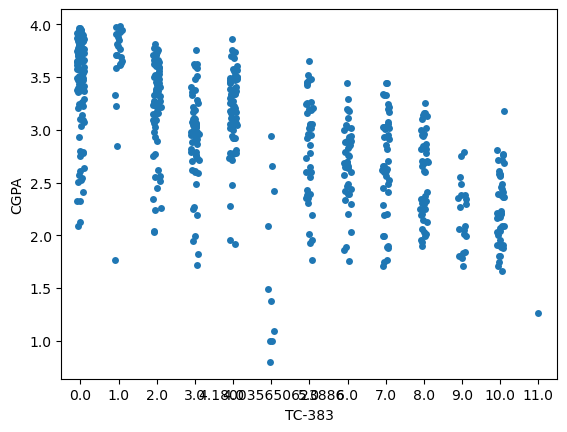

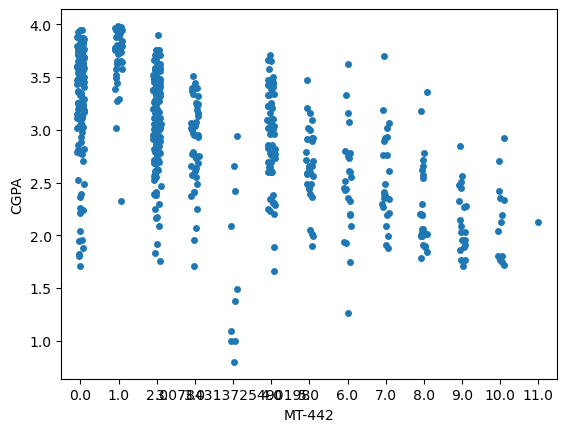

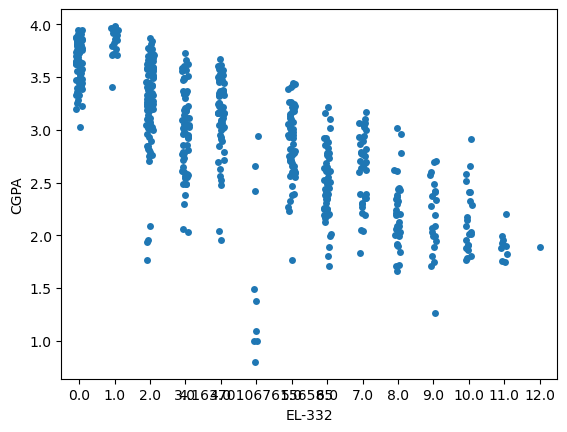

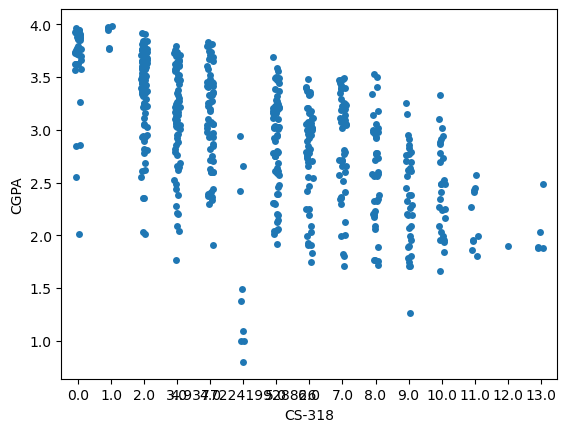

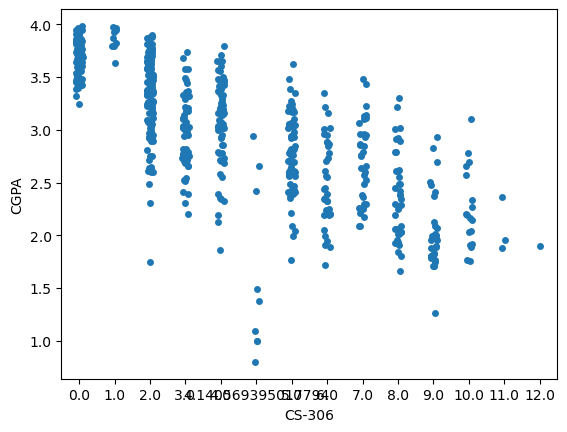

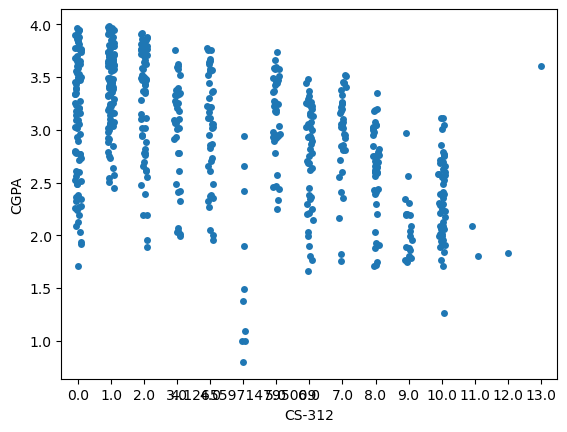

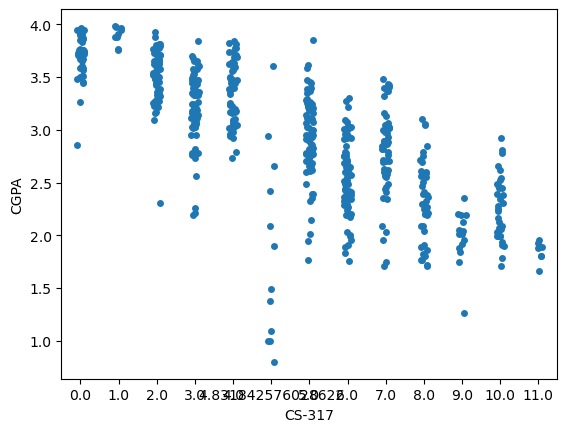

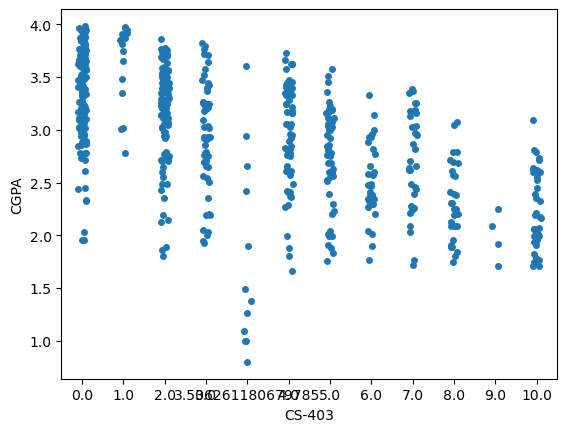

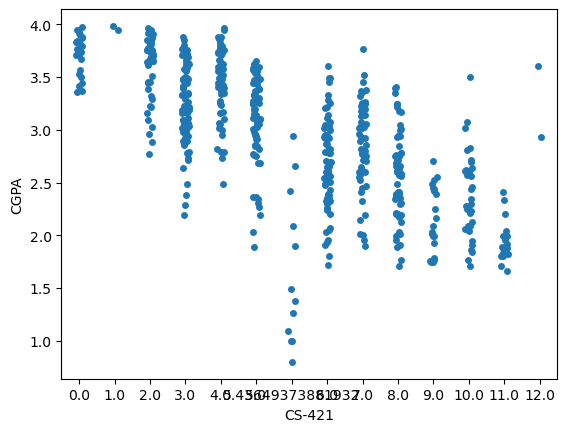

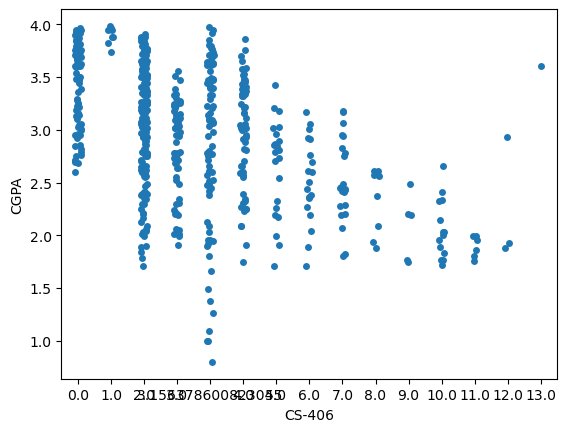

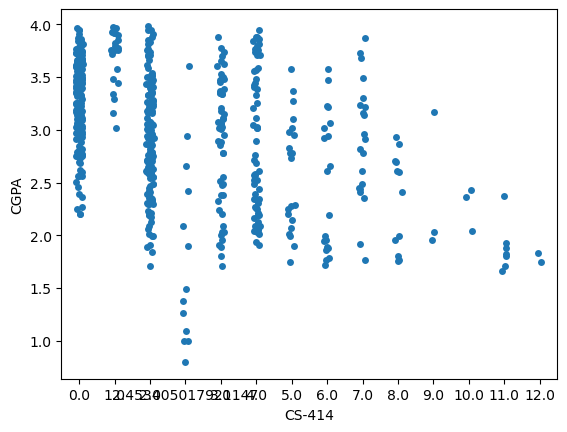

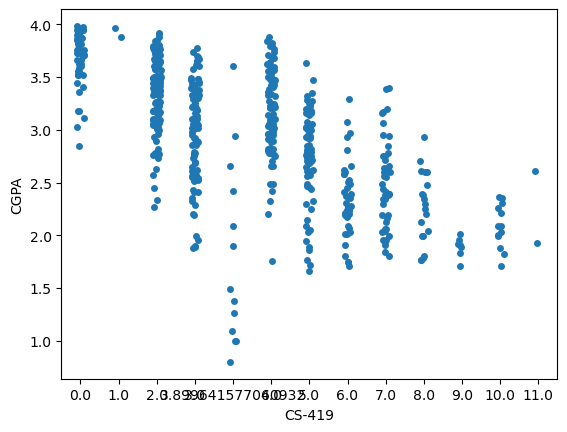

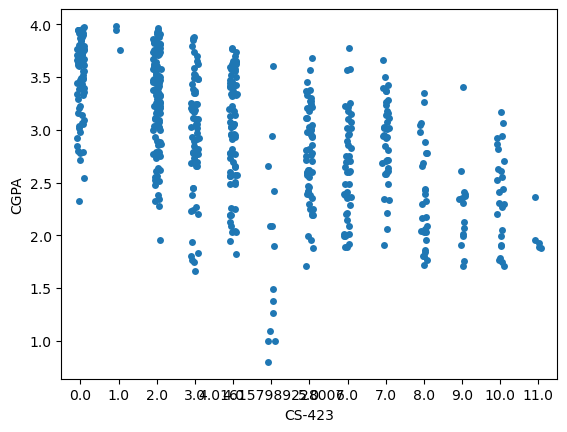

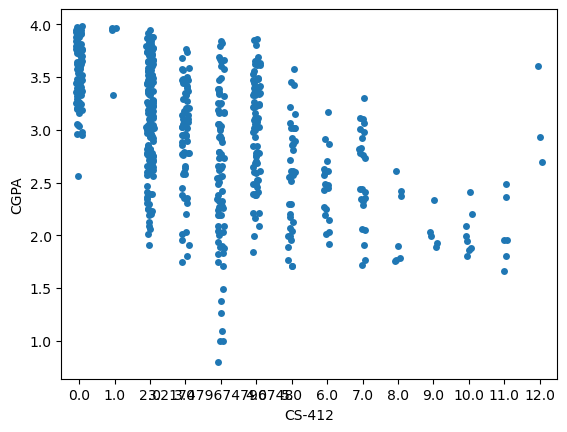

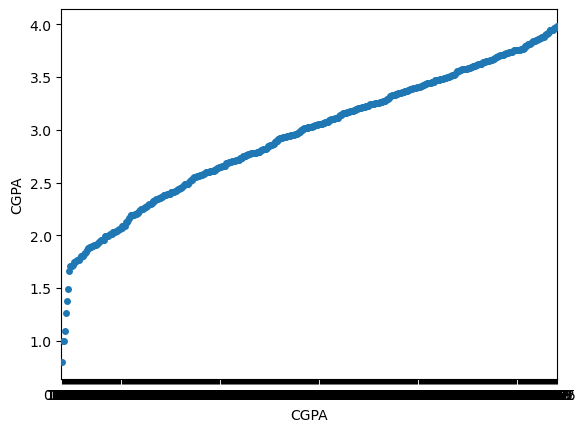

In [53]:
for i in df.columns:
    sns.stripplot(x= df[i], y='CGPA', data=df)
    plt.show()

Distribution of Data

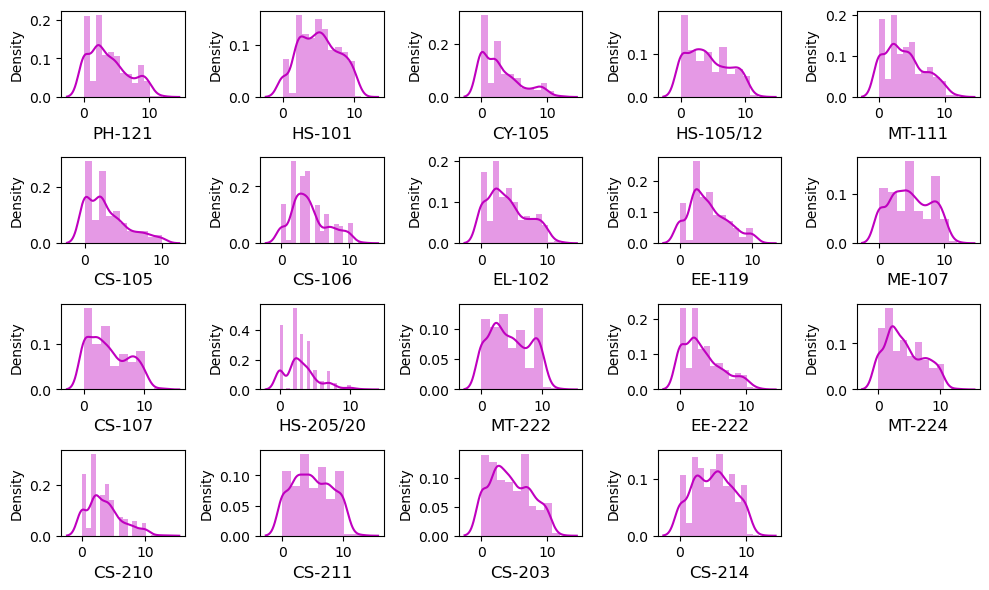

In [54]:
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in df:
    if plotnumber<=19:
        ax= plt.subplot(4,5, plotnumber)
        sns.distplot(df[col], color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

Data looks normal there are not much skewness in data


In [55]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.561257,0.503328,0.473865,0.609990,0.300326,0.428904,0.583942,0.539628,...,0.065546,0.462357,0.361424,0.322118,0.334384,0.184295,0.490516,0.120201,0.376729,-0.663135
HS-101,0.382436,1.000000,0.335929,0.474642,0.435802,0.400713,0.315237,0.352473,0.313500,0.340283,...,0.226366,0.363525,0.248781,0.318699,0.262115,0.242860,0.298372,0.241878,0.253986,-0.537170
CY-105,0.561257,0.335929,1.000000,0.509059,0.540425,0.582351,0.381355,0.449477,0.477587,0.472656,...,0.294275,0.470400,0.513598,0.389937,0.157141,0.047853,0.465035,0.152447,0.127349,-0.662887
HS-105/12,0.503328,0.474642,0.509059,1.000000,0.495679,0.487617,0.501480,0.360955,0.409977,0.327167,...,0.284353,0.478258,0.482200,0.440861,0.185272,0.166302,0.486979,0.254651,0.188988,-0.620435
MT-111,0.473865,0.435802,0.540425,0.495679,1.000000,0.399073,0.506010,0.555253,0.410799,0.472215,...,0.489438,0.554495,0.442927,0.535777,0.289468,0.251900,0.523101,0.420303,0.283890,-0.737130
CS-105,0.609990,0.400713,0.582351,0.487617,0.399073,1.000000,0.292389,0.359414,0.512131,0.459748,...,0.083694,0.386140,0.315958,0.265798,0.286342,0.151762,0.332057,0.067729,0.251044,-0.613169
CS-106,0.300326,0.315237,0.381355,0.501480,0.506010,0.292389,1.000000,0.342688,0.278973,0.291643,...,0.471995,0.415936,0.458847,0.419784,0.119781,0.130931,0.442221,0.357555,0.185430,-0.542916
EL-102,0.428904,0.352473,0.449477,0.360955,0.555253,0.359414,0.342688,1.000000,0.451465,0.468407,...,0.325742,0.465479,0.340339,0.396015,0.246583,0.271220,0.403475,0.393442,0.286259,-0.649374
EE-119,0.583942,0.313500,0.477587,0.409977,0.410799,0.512131,0.278973,0.451465,1.000000,0.573726,...,0.173792,0.445123,0.371199,0.377628,0.330949,0.233401,0.483184,0.260564,0.370567,-0.653498
ME-107,0.539628,0.340283,0.472656,0.327167,0.472215,0.459748,0.291643,0.468407,0.573726,1.000000,...,0.217957,0.462002,0.366446,0.369621,0.319081,0.178727,0.462495,0.241351,0.343230,-0.669373


<Axes: >

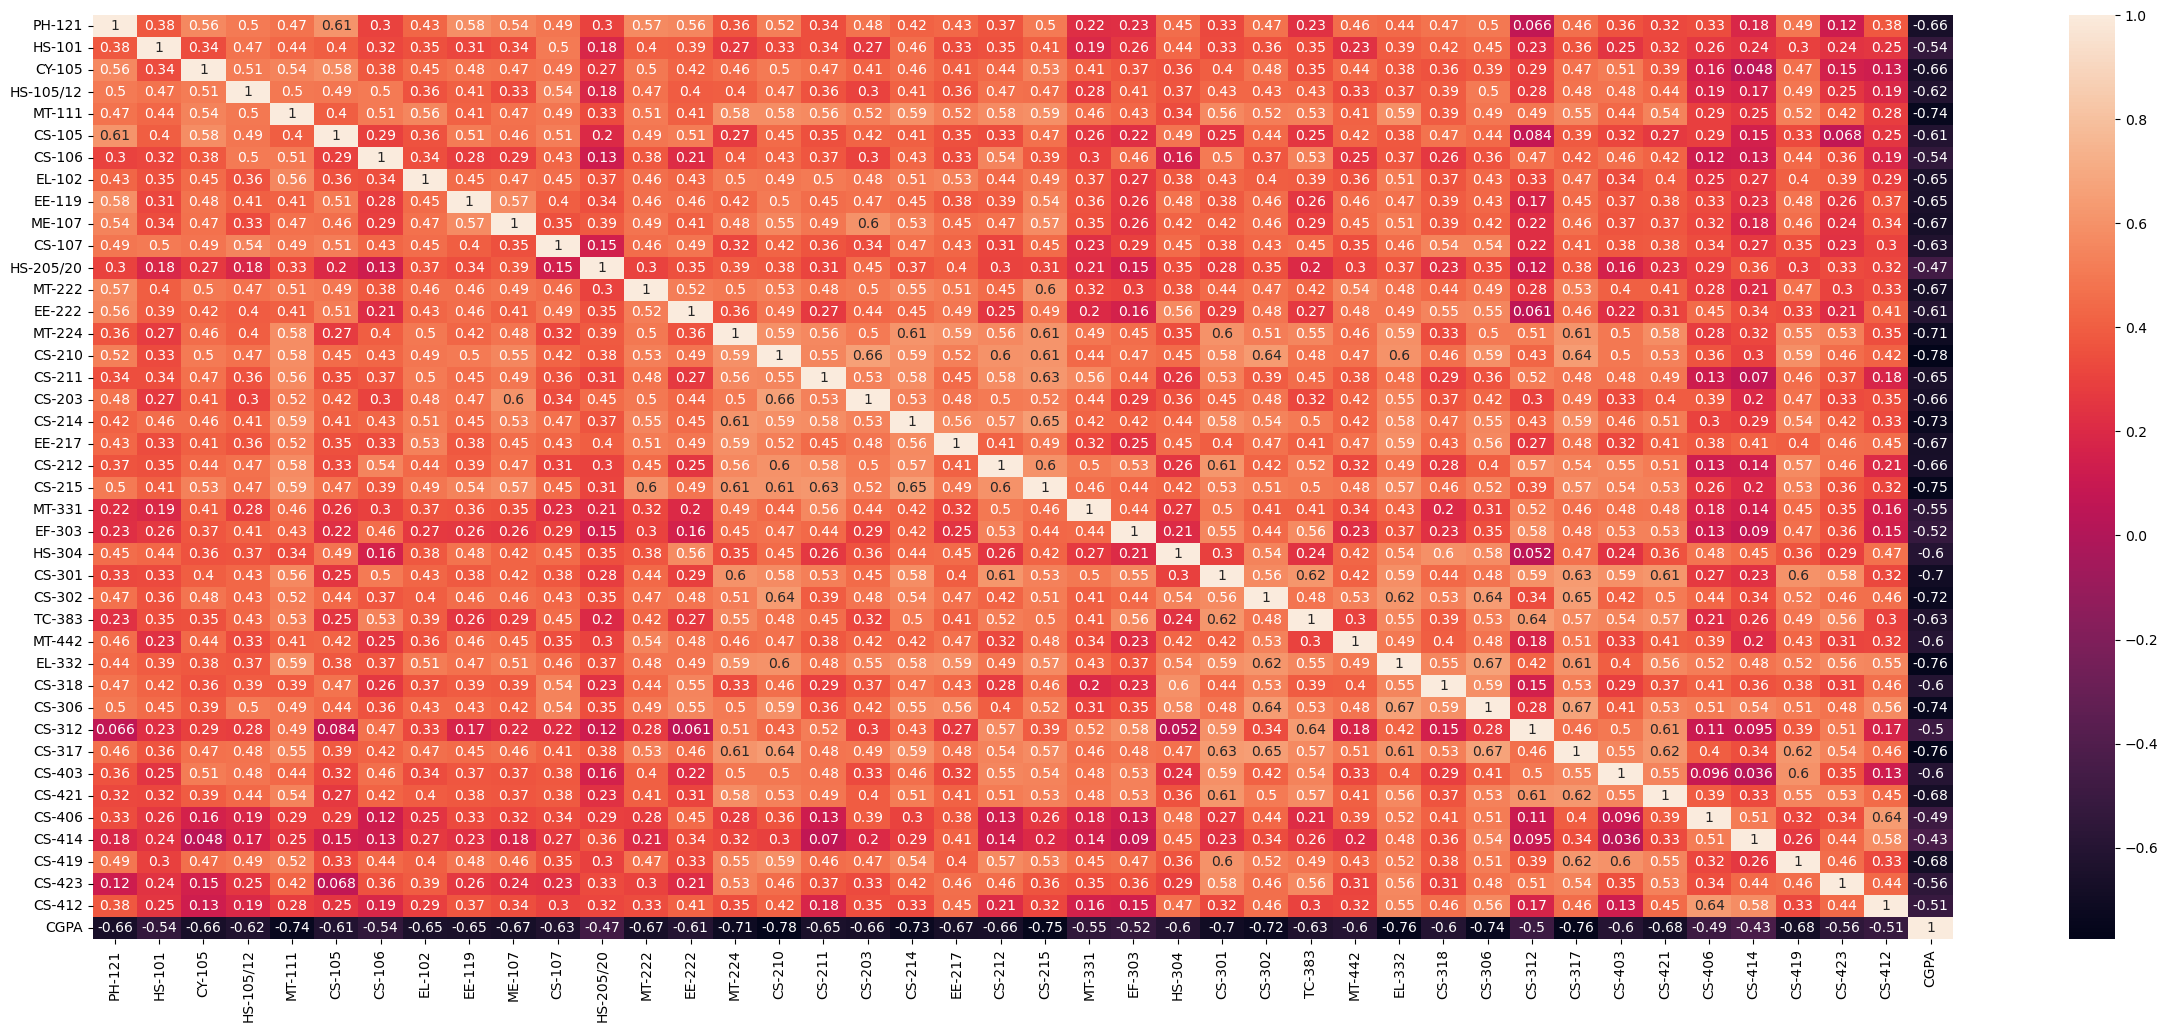

In [62]:
plt.figure(figsize=(30,12), facecolor='white')
sns.heatmap(df.corr(), annot=True)

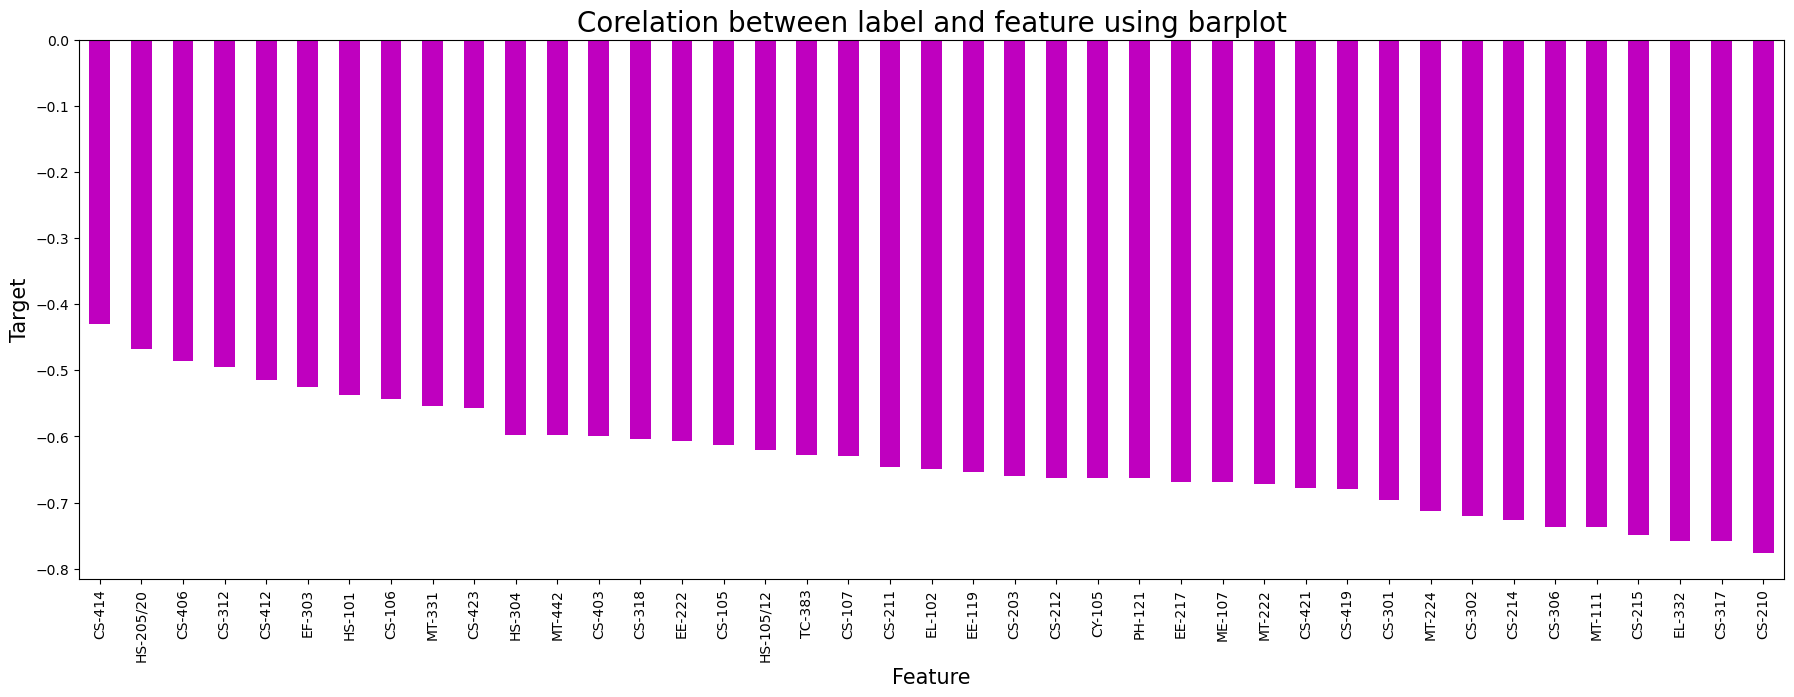

In [64]:
plt.figure(figsize=(22,7))
df.corr()['CGPA'].sort_values(ascending=False).drop(['CGPA']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Corelation between label and feature using barplot", fontsize=20)
plt.show()

In [70]:
x= df.drop('CGPA',axis=1)
y= df['CGPA']

**Feature Scaling using Standard Scalarization**

In [71]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.721991,0.548389,1.372963,2.657832,1.789175,1.332669,0.417365,1.022864,...,0.654698,1.161705,1.157159,1.530930,0.947978,-0.475565,-0.993185,1.734677,-0.366108,-0.531176
1,-1.242052,1.411559,2.397746,1.488014,0.367537,1.173242,1.789175,-1.310604,2.302135,1.341424,...,1.710986,1.761537,1.522406,0.849569,1.317776,-0.475565,1.030910,0.888567,0.714752,-0.094885
2,-1.242052,-0.744483,-0.981031,0.235181,0.032395,-1.053643,0.319611,0.011033,-0.713496,-0.888497,...,-0.753686,-0.337873,-0.669075,-1.194515,0.208383,-1.298071,-0.993185,-1.649763,-0.726395,-1.403760
3,1.714365,0.692879,2.397746,1.488014,1.708105,-0.311348,2.156566,1.332669,1.925181,0.704303,...,1.358890,1.761537,0.426666,2.212291,0.947978,0.758195,0.221272,1.311622,1.075039,1.650282
4,-0.585070,-1.103823,-0.305275,-0.078027,-1.308173,-1.053643,-0.782562,0.011033,-1.467404,-0.888497,...,-0.753686,0.261958,-0.303828,0.168207,-0.161414,-0.475565,-0.993185,-0.803653,-0.726395,-1.403760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.981031,-0.704444,-0.973031,-1.053643,-0.782562,-0.649785,-1.090450,-0.251377,...,-0.049494,-0.637789,-1.034321,-1.194515,-2.010402,-1.298071,0.626091,0.042457,-0.366108,-1.403760
567,-0.913561,-1.822504,-0.981031,-1.330861,-1.308173,-1.053643,-1.517344,-0.649785,-1.467404,-1.525618,...,-0.753686,-0.037957,-0.303828,-1.194515,-2.010402,-0.475565,0.221272,-0.803653,0.714752,-0.531176
568,-0.256579,-1.822504,-0.305275,-0.078027,-1.308173,-1.053643,-1.517344,-1.310604,-1.467404,-0.569937,...,-0.049494,-0.637789,-0.669075,-1.194515,-0.531212,-1.298071,1.435729,0.042457,-0.726395,-0.531176
569,-1.242052,-0.385142,2.059868,-1.330861,1.708105,2.657832,0.319611,1.332669,0.417365,1.022864,...,-0.049494,1.461621,-0.669075,-0.172473,0.947978,2.403209,1.435729,-0.380598,0.354465,1.213991


Checking VIF

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,2.887608,PH-121
1,1.780073,HS-101
2,2.535059,CY-105
3,2.312290,HS-105/12
4,2.655385,MT-111
5,2.401514,CS-105
6,1.956274,CS-106
7,1.995045,EL-102
8,2.199691,EE-119
9,2.313336,ME-107


It looks normal

# Model Building

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [74]:
#Finding the best Random State
MaxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train, y_train)
    pred= lr.predict(x_test)
    acc= r2_score(y_test, pred)
    if acc>MaxAccu:
        MaxAccu= acc
        maxRs=i
print("Maximum r2 score is ", MaxAccu, "On random state", maxRs)

Maximum r2 score is  0.98015939928551 On random state 106


In [75]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=maxRs)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [77]:
lr= LinearRegression()
lr.fit(x_train, y_train)
pred_lr= lr.predict(x_test)
pred_train= lr.predict(x_train)
print('R2_score', r2_score(y_test, pred_lr))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_lr))
print('Mean Squared Error', mean_squared_error(y_test, pred_lr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_lr)))

R2_score 0.98015939928551
R2_score on training 94.02573465623206
Mean Absolute Error 0.0668446262679105
Mean Squared Error 0.0071651266312677715
Root mean Squared Error 0.08464707101410994


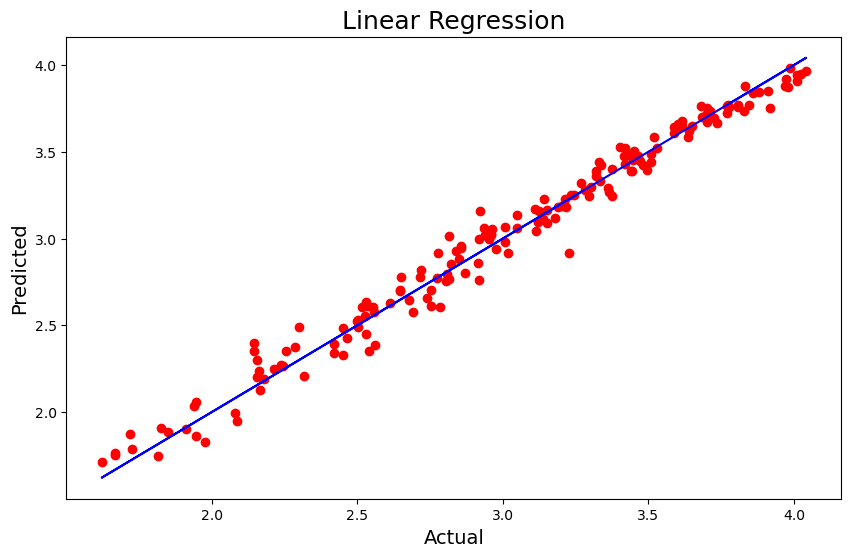

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_lr, y=y_test, color='r')
plt.plot(pred_lr, pred_lr, color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title("Linear Regression", fontsize=18)
plt.show()

In [79]:
rf= RandomForestRegressor()
rf.fit(x_train, y_train)
pred_rf= rf.predict(x_test)
pred_train= rf.predict(x_train)
print('R2_score', r2_score(y_test, pred_rf))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_rf))
print('Mean Squared Error', mean_squared_error(y_test, pred_rf))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_rf)))

R2_score 0.9460446293275129
R2_score on training 99.0263282010866
Mean Absolute Error 0.10804377906976721
Mean Squared Error 0.019485149107558088
Root mean Squared Error 0.13958921558472234


In [80]:
knn= KNN()
knn.fit(x_train, y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score', r2_score(y_test, pred_knn))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error', mean_squared_error(y_test, pred_knn))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score 0.9601903094737694
R2_score on training 94.51815434267385
Mean Absolute Error 0.09421279069767445
Mean Squared Error 0.014376655116279075
Root mean Squared Error 0.11990269019617147


In [81]:
dt= DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_dt= dt.predict(x_test)
pred_train= dt.predict(x_train)
print('R2_score', r2_score(y_test, pred_dt))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_dt))
print('Mean Squared Error', mean_squared_error(y_test, pred_dt))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_dt)))

R2_score 0.8105164353630908
R2_score on training 100.0
Mean Absolute Error 0.19102906976744186
Mean Squared Error 0.06842906395348837
Root mean Squared Error 0.261589495113027


In [82]:
gb= GradientBoostingRegressor()
gb.fit(x_train, y_train)
pred_gb= gb.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_gb))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_gb))
print('Mean Squared Error', mean_squared_error(y_test, pred_gb))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_gb)))

R2_score 0.9606767508294755
R2_score on training 99.59214127992159
Mean Absolute Error 0.09301028900023152
Mean Squared Error 0.014200984330778385
Root mean Squared Error 0.1191678829667557


In [83]:
er= ExtraTreeRegressor()
er.fit(x_train, y_train)
pred_er= er.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_er))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_er))
print('Mean Squared Error', mean_squared_error(y_test, pred_er))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_er)))

R2_score 0.7493276056520289
R2_score on training 99.59214127992159
Mean Absolute Error 0.20238372093023257
Mean Squared Error 0.09052646511627907
Root mean Squared Error 0.30087616242613685


In [84]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train, y_train)
pred_svr=svr.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_svr))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error', mean_squared_error(y_test, pred_svr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_svr)))


R2_score 0.9736101664895208
R2_score on training 99.59214127992159
Mean Absolute Error 0.07402144076981676
Mean Squared Error 0.009530280942681503
Root mean Squared Error 0.0976231578196562


In [85]:
rr= Ridge()
rr.fit(x_train, y_train)
pred_rr=rr.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_rr))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_rr))
print('Mean Squared Error', mean_squared_error(y_test, pred_rr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_rr)))

R2_score 0.9803121951558904
R2_score on training 99.59214127992159
Mean Absolute Error 0.06657741328357389
Mean Squared Error 0.007109946761677877
Root mean Squared Error 0.08432050024565721


# Cross Validation

In [86]:
from sklearn.model_selection import cross_val_score


In [87]:
score= cross_val_score(knn,x,y, cv=5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_knn)-score.mean()))

[0.92244382 0.95076769 0.91711497 0.96211435 0.87690124]
0.9258684147082015
Difference between R2 score and cross validation score is  0.034321894765567906


In [88]:
score1= cross_val_score(lr,x,y, cv=5, scoring = 'r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_lr)-score.mean()))

[0.94059487 0.95258318 0.93596504 0.97437747 0.90282334]
0.9412687797735485
Difference between R2 score and cross validation score is  0.05429098457730852


In [89]:
score2= cross_val_score(rf,x,y, cv=5, scoring = 'r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_rf)-score.mean()))

[0.93977144 0.92654007 0.943156   0.94382028 0.88264141]
0.927185840590683
Difference between R2 score and cross validation score is  0.020176214619311406


In [90]:
score3= cross_val_score(dt,x,y, cv=5, scoring = 'r2')
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_dt)-score.mean()))

[0.84508365 0.86044514 0.8578108  0.79920194 0.74069518]
0.8206473423955505
Difference between R2 score and cross validation score is  -0.11535197934511066


In [91]:
score4= cross_val_score(gb,x,y, cv=5, scoring = 'r2')
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_gb)-score.mean()))

[0.96535822 0.94423377 0.95979037 0.95670001 0.90395052]
0.9460065766168764
Difference between R2 score and cross validation score is  0.034808336121273986


In [92]:
score5= cross_val_score(er,x,y, cv=5, scoring = 'r2')
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_er)-score.mean()))

[0.74642125 0.8566264  0.68161865 0.6189305  0.70389072]
0.7214975045992009
Difference between R2 score and cross validation score is  -0.17654080905617253


In [93]:
score6= cross_val_score(svr,x,y, cv=5, scoring = 'r2')
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_svr)-score.mean()))

[0.92603821 0.9419073  0.92650484 0.95273517 0.88466107]
0.9263693185123829
Difference between R2 score and cross validation score is  0.04774175178131934


In [94]:
score7= cross_val_score(rr,x,y, cv=5, scoring = 'r2')
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_rr)-score.mean()))

[0.94066417 0.9526316  0.9360366  0.97454263 0.90288386]
0.9413517707978935
Difference between R2 score and cross validation score is  0.05444378044768894


Linear Regression give best scores

# Hyper Paramter Tunning

In [96]:
from sklearn.model_selection import GridSearchCV

In [110]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

In [111]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)
gscv= GridSearchCV(lr,param_grid,cv=5,scoring=scorer)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [112]:
gscv.best_params_

{'fit_intercept': True, 'positive': False}

In [114]:
Model = LinearRegression(fit_intercept= True, positive= False)

In [115]:
Model.fit(x_train, y_train)
pred= Model.predict(x_test)
print('R2_score', r2_score(y_test, pred))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred))
print('Mean Squared Error', mean_squared_error(y_test, pred_rr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred)))

R2_score 0.98015939928551
R2_score on training 99.59214127992159
Mean Absolute Error 0.0668446262679105
Mean Squared Error 0.007109946761677877
Root mean Squared Error 0.08464707101410994


# Saving Model

In [116]:
import joblib
joblib.dump(Model, "Student CGPA")

['Student CGPA']

In [117]:
import pickle
filename= 'WorldHappiness'
pickle.dump(Model, open(filename, 'wb'))